## Chapter 11. 피벗과 언피벗

### 11.1. 피벗 테이블

#### 11.1.1. 피벗 테이블을 사용하는 이유

#### 11.1.2. 피벗 테이블과 집계 함수

#### 11.1.3. 피벗 테이블 생성하기(pivot_table)

In [1]:
# 코드 11-1. 다양한 피벗 테이블을 생성 실습 예제 코드
import pandas as pd
pd.options.display.float_format = '{:.1f}'.format # 소수점 첫째 자리 출력
data = [['김판다', '남', 'A', 97, '1등', '수시'],
        ['강승주', '여', 'A', 88, '2등', '정시'],
        ['권보아', '여', 'A', 78, '3등', '정시'],
        ['조민영', '여', 'B', 64, '3등', '수시'],
        ['박상현', '남', 'B', 84, '2등', '수시'],
        ['송중기', '남', 'B', 89, '1등', '수시'],
        ['최진환', '남', 'C', 87, '3등', '정시'],
        ['장범준', '남', 'C', 92, '2등', '정시'],
        ['안지선', '여', 'C', 99, '1등', '수시']]
col = ['이름', '성별', '반', '점수', '반등수', '비고']

data1 = {'제품': ['A', 'B', 'A', 'B', 'B', 'A'],
         '판매량': [float('nan'), 2, 3, 4, float('nan'), 6]}

df = pd.DataFrame(data, columns=col)
df1 = pd.DataFrame(data1)
df

,이름,성별,반,점수,반등수,비고
0,김판다,남,A,97,1등,수시
1,강승주,여,A,88,2등,정시
2,권보아,여,A,78,3등,정시
3,조민영,여,B,64,3등,수시
4,박상현,남,B,84,2등,수시
5,송중기,남,B,89,1등,수시
6,최진환,남,C,87,3등,정시
7,장범준,남,C,92,2등,정시
8,안지선,여,C,99,1등,수시


In [2]:
# 코드 11-2. df를 반(index)과 성별(columns)로 구분해 평균 점수 구하기
df.pivot_table('점수', index='반', columns='성별', aggfunc='mean')

성별,남,여
반,,
A,97.0,83.0
B,86.5,64.0
C,89.5,99.0


In [3]:
# 코드 11-3. 매개변수 aggfunc의 기본값이 'mean'이기에 생략이 가능하다.
df.pivot_table('점수', index='반', columns='성별')

성별,남,여
반,,
A,97.0,83.0
B,86.5,64.0
C,89.5,99.0


#### 11.1.4. 복수의 인수를 입력해 피벗 테이블 만들기

In [4]:
# 코드 11-4. 반과 성별(index), 비고(columns)로 나누어 평균 점수 구하기
df.pivot_table('점수', index=['반', '성별'], columns='비고')

비고     수시   정시
반 성별          
A 남  97.0  NaN
  여   NaN 83.0
B 남  86.5  NaN
  여  64.0  NaN
C 남   NaN 89.5
  여  99.0  NaN

In [5]:
# 코드 11-5. 반(index)과 성별(columns)로 나누어 평균 점수와 인원수 구하기
df.pivot_table('점수', index='반', columns='성별', aggfunc=['mean', 'count'])

mean      count   
성별    남    여     남  여
반                    
A  97.0 83.0     1  2
B  86.5 64.0     2  1
C  89.5 99.0     2  1

#### 11.1.5. 인수로 함수를 입력하는 방법

#### 11.1.6. 그룹화에만 적용되는 집계 함수(first, last)

실습에 쓰일 df1 확인

|    | 제품   |   판매량 |
|---:|:-------|---------:|
|  0 | A      |      NaN |
|  1 | B      |        2 |
|  2 | A      |        3 |
|  3 | B      |        4 |
|  4 | B      |      NaN |
|  5 | A      |        6 |

In [6]:
# 코드 11-6. 제품별로 첫 번째 판매량을 집계
df1.pivot_table('판매량', index='제품', aggfunc='first')

,판매량
제품,
A,3.0
B,2.0


In [7]:
# 코드 11-7. 제품별로 마지막 판매량을 집계
df1.pivot_table('판매량', index='제품', aggfunc='last')

,판매량
제품,
A,6.0
B,4.0


In [8]:
# 코드 11-8. 반(index)과 성별(columns)로 나누어 1등의 명단 생성하기
(df.sort_values('점수', ascending=False)
   .pivot_table('이름', index='반', columns='성별', aggfunc='first')
)

성별,남,여
반,,
A,김판다,강승주
B,송중기,조민영
C,장범준,안지선


#### 11.1.7. 문자열 피벗(pivot)

In [9]:
# 코드 11-9. pivot 함수로 반(index), 반등수(columns)로 나누어 이름을 피벗
df.pivot(index='반', columns='반등수', values='이름')

반등수,1등,2등,3등
반,,,
A,김판다,강승주,권보아
B,송중기,박상현,조민영
C,안지선,장범준,최진환


#### 11.1.8. 빈도수를 집계하는 교차표 만들기(crosstab)

In [10]:
# 코드 11-10. crosstab 함수 실습 예제 코드
data = {'반': ['A', 'A', 'A', 'B', 'B', 'B'],
        '성별': ['남', '여', '여', '여', '남', '남']}
df = pd.DataFrame(data)
df

,반,성별
0,A,남
1,A,여
2,A,여
3,B,여
4,B,남
5,B,남


In [11]:
# 코드 11-11. 반(index), 성별(columns)을 나누어 crosstab 함수로 인원수 집계
pd.crosstab(df['반'], df['성별'])

성별,남,여
반,,
A,1,2
B,2,1


### 엑셀 예제 14. 타이타닉 침몰 사고에서 과연 여성과 아이를 먼저 구조했을까?

In [12]:
# 코드 11-12. 타이타닉 엑셀 파일에서 데이터 프레임 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
pd.options.display.float_format = '{:.3f}'.format # 소수점 셋째 자리 출력
url1 = 'https://github.com/panda-kim/book1/blob/main/05titanic.xlsx?raw=true'
df_titanic = pd.read_excel(url1)
df_titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000,0,0,370376,7.750,NaN,Q


In [13]:
# 코드 11-13. 성별(index)과 객실 등급(columns)으로 나누어 생존율 구하기
df_result = df_titanic.pivot_table(
    values='Survived', index='Pclass', columns='Gender'
)
df_result

Gender,female,male
Pclass,,
1,0.968,0.369
2,0.921,0.157
3,0.500,0.135


In [14]:
# 코드 11-14. df_result의 열 순서를 male, female으로 변경하고 인덱스명 삭제
df_result = df_result[['male', 'female']].rename_axis(None, axis=1)
df_result

,male,female
Pclass,,
1,0.369,0.968
2,0.157,0.921
3,0.135,0.500


In [15]:
# 코드 11-15. 객실 등급(columns)으로 나누어 15세 이하의 생존율을 구하기
cond = df_titanic['Age'] <= 15
df_child = df_titanic[cond].pivot_table(values='Survived', index='Pclass')
df_child

,Survived
Pclass,
1,0.833
2,1.000
3,0.431


In [16]:
# 코드 11-16. df_result에 15세 이하의 생존율을 열로 생성하기
df_result['Under 15'] = df_child['Survived']
df_result

,male,female,Under 15
Pclass,,,
1,0.369,0.968,0.833
2,0.157,0.921,1.000
3,0.135,0.500,0.431


<Axes: xlabel='Pclass'>

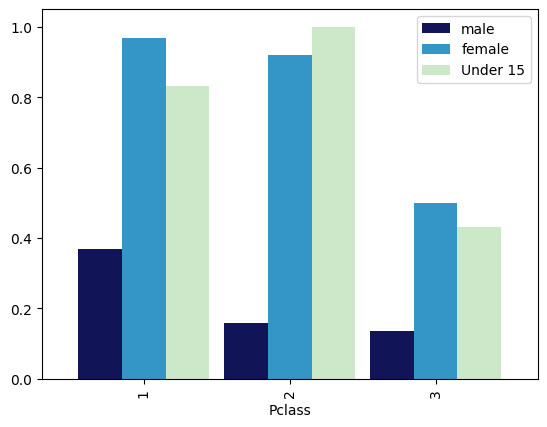

In [17]:
# 코드 11-17. df_result를 시각화
colors = ['#111558', '#3496c6', '#cce8c8'] # 헥스 코드로 색상 설정
df_result.plot(kind='bar', color=colors, width=.9)

### 11.2. 언피벗

#### 11.2.1. 언피벗이 필요한 이유

#### 11.2.2. stack 함수로 언피벗

In [18]:
# 코드 11-18. stack과 reset_index로 언피벗 실습 예제 코드
import pandas as pd
pd.options.display.max_rows = 10 # 10행까지만 출력 코드
data1 = {'1등': {'1회차': '김판다', '2회차': '박효신', '3회차': '김판다'},
         '2등': {'1회차': '권보아', '2회차': '권보아', '3회차': '박효신'},
         '3등': {'1회차': '박효신', '2회차': '강승주', '3회차': '김범수'}}
df = pd.DataFrame(data1)
df

,1등,2등,3등
1회차,김판다,권보아,박효신
2회차,박효신,권보아,강승주
3회차,김판다,박효신,김범수


In [19]:
# 코드 11-19. stack과 reset_index로 언피벗하기
df.stack().reset_index()

,level_0,level_1,0
0,1회차,1등,김판다
1,1회차,2등,권보아
2,1회차,3등,박효신
3,2회차,1등,박효신
4,2회차,2등,권보아
5,2회차,3등,강승주
6,3회차,1등,김판다
7,3회차,2등,박효신
8,3회차,3등,김범수


In [20]:
# 코드 11-20. 코드 11-19의 결과에서 열 이름을 설정해 변수 df1으로 지정
df1 = df.stack().reset_index().set_axis(['회차', '등수', '이름'], axis=1)
df1

,회차,등수,이름
0,1회차,1등,김판다
1,1회차,2등,권보아
2,1회차,3등,박효신
3,2회차,1등,박효신
4,2회차,2등,권보아
5,2회차,3등,강승주
6,3회차,1등,김판다
7,3회차,2등,박효신
8,3회차,3등,김범수


In [21]:
# 코드 11-21. 각 사람의 입상 빈도수를 집계
pd.crosstab(df1['이름'], df1['등수'])

등수,1등,2등,3등
이름,,,
강승주,0,0,1
권보아,0,2,0
김범수,0,0,1
김판다,2,0,0
박효신,1,1,1


#### 11.2.3. melt 함수로 언피벗

In [22]:
# 코드 11-22. melt 함수 실습 예제 코드
import pandas as pd
data = {'반': ['A', 'B', 'C'], '남': [10, 20, 15], '여': [30, 40, 35]}
df = pd.DataFrame(data)
df1 = df.set_index('반')
df

,반,남,여
0,A,10,30
1,B,20,40
2,C,15,35


In [23]:
# 코드 11-23. melt 함수로 언피벗하기
df.melt('반', value_vars=['남', '여'])

,반,variable,value
0,A,남,10
1,B,남,20
2,C,남,15
3,A,여,30
4,B,여,40
5,C,여,35


In [24]:
# 코드 11-24. value_vars를 생략해도 코드 11-23과 같은 결과를 얻는다.
df.melt('반')

,반,variable,value
0,A,남,10
1,B,남,20
2,C,남,15
3,A,여,30
4,B,여,40
5,C,여,35


In [25]:
# 코드 11-25. 언피벗 결과에서 열 이름 설정하기
df.melt('반', var_name='성별', value_name='인원수')

,반,성별,인원수
0,A,남,10
1,B,남,20
2,C,남,15
3,A,여,30
4,B,여,40
5,C,여,35


#### 11.2.4. stack 함수와 melt 함수의 언피벗 수행의 차이점


### 엑셀 예제 15. 피벗 테이블로 보존된 마트의 매출 데이터로 다양한 집계하기

In [26]:
# 코드 11-26. 첫번째 시트만 데이터 프레임으로 불러오기
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format # 소수점 둘째 자리 출력
pd.options.display.max_rows = 6 # 6행까지만 출력
url2 = 'https://github.com/panda-kim/book1/blob/main/17mart.xlsx?raw=true'
df1 = pd.read_excel(url2)
df1

,제품,강남점,서초점,송파점,노원점,은평점,금천점,신도림점,용인 죽전점,용인 수지점,수원 영통점,인천 주안점,인천 검단점,동인천점,분당점,일산점,부평점,부천 옥길점
0,종합어묵 (300g),1930000,1350000,630000,420000,1360000,1370000,1880000,1210000,710000,1130000,280000,1260000,1480000,960000,960000,710000,1220000
1,유기농떡튀밥 (40g),320000,380000,490000,1320000,1380000,1350000,1280000,860000,720000,1500000,1090000,1850000,420000,570000,720000,1680000,1020000
2,염장다시마 (400g),1310000,1700000,670000,640000,1180000,1840000,910000,1080000,240000,1510000,660000,1420000,260000,1440000,1880000,410000,780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,생선가스 (300g),850000,1440000,200000,300000,410000,300000,1090000,1830000,610000,1690000,1390000,1210000,390000,940000,650000,1300000,1300000
198,게맛살 (178g),1240000,380000,1680000,1500000,730000,550000,440000,1730000,300000,1700000,450000,1980000,330000,1430000,1620000,1780000,1610000
199,멸치가루 (120g),250000,1170000,1980000,340000,1760000,550000,920000,280000,400000,1370000,1310000,1710000,980000,1370000,1890000,930000,1030000


In [27]:
# 코드 11-27. 첫 번째 시트 언피벗하기
df1.melt('제품', var_name='지점', value_name='매출')

,제품,지점,매출
0,종합어묵 (300g),강남점,1930000
1,유기농떡튀밥 (40g),강남점,320000
2,염장다시마 (400g),강남점,1310000
...,...,...,...
3397,생선가스 (300g),부천 옥길점,1300000
3398,게맛살 (178g),부천 옥길점,1610000
3399,멸치가루 (120g),부천 옥길점,1030000


In [28]:
# 코드 11-28. 첫 번째와 두 번째 시트를 언피벗하고 연결
# 첫 번째 시트 언피벗
df1 = pd.read_excel(url2)
df1 = df1.melt('제품', var_name='지점', value_name='매출')
df1['날짜'] = '2023-08' # 각 시트에 맞게 날짜 데이터 생성

# 두 번째 시트 언피벗
df2 = pd.read_excel(url2, sheet_name=1)
df2 = df2.melt('제품', var_name='지점', value_name='매출')
df2['날짜'] = '2023-09' # 각 시트에 맞게 날짜 데이터 생성

# df1과 df2를 concat로 연결하고, 결과를 변수 df_mart로 지정
df_mart = pd.concat([df1, df2]).reset_index(drop=True)
df_mart

,제품,지점,매출,날짜
0,종합어묵 (300g),강남점,1930000,2023-08
1,유기농떡튀밥 (40g),강남점,320000,2023-08
2,염장다시마 (400g),강남점,1310000,2023-08
...,...,...,...,...
6797,생선가스 (300g),부천 옥길점,1490000,2023-09
6798,게맛살 (178g),부천 옥길점,1740000,2023-09
6799,멸치가루 (120g),부천 옥길점,410000,2023-09


In [29]:
# 코드 11-29. df_mart에 지점구분 시트를 병합
df_mart = df_mart.merge(pd.read_excel(url2, sheet_name=2), how='left')
df_mart

,제품,지점,매출,날짜,지역,분류
0,종합어묵 (300g),강남점,1930000,2023-08,서울,직영점
1,유기농떡튀밥 (40g),강남점,320000,2023-08,서울,직영점
2,염장다시마 (400g),강남점,1310000,2023-08,서울,직영점
...,...,...,...,...,...,...
6797,생선가스 (300g),부천 옥길점,1490000,2023-09,경기,직영점
6798,게맛살 (178g),부천 옥길점,1740000,2023-09,경기,직영점
6799,멸치가루 (120g),부천 옥길점,410000,2023-09,경기,직영점


In [30]:
# 코드 11-30. df_mart에 제품구분 시트를 병합
df_mart = df_mart.merge(pd.read_excel(url2, sheet_name=3), how='left')
df_mart

,제품,지점,매출,날짜,지역,분류,구분
0,종합어묵 (300g),강남점,1930000,2023-08,서울,직영점,기타
1,유기농떡튀밥 (40g),강남점,320000,2023-08,서울,직영점,기타
2,염장다시마 (400g),강남점,1310000,2023-08,서울,직영점,기타
...,...,...,...,...,...,...,...
6797,생선가스 (300g),부천 옥길점,1490000,2023-09,경기,직영점,기타
6798,게맛살 (178g),부천 옥길점,1740000,2023-09,경기,직영점,기타
6799,멸치가루 (120g),부천 옥길점,410000,2023-09,경기,직영점,기타


In [31]:
# 코드 11-31. 지역(index)과 날짜(columns)를 구분해 매출 합계 구하기
df_mart.pivot_table('매출', index='지역', columns='날짜', aggfunc='sum')

날짜,2023-08,2023-09
지역,,
경기,1318210000,1299740000
서울,1544910000,1544090000
인천,870330000,896060000


In [32]:
# 코드 11-32. 청과 제품군의 총매출량을 월별로 직영점과 비직영점 비교하기
cond = df_mart['구분'] == '청과'
df_mart[cond].pivot_table('매출', index='날짜', columns='분류', aggfunc='sum')

분류,비직영점,직영점
날짜,,
2023-08,72030000,97290000
2023-09,72080000,92360000
